# 1. Import Packages

In [1]:
# # Code to install packages used. Uncomment to install.

# !pip3 install numpy
# !pip3 install pandas
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install scikit-learn
# !pip3 install category_encoders

In [2]:
# Data visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Time, for time metrics
from time import time

# Model and preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report


# 2. Read Data

In [3]:
student_df = pd.read_csv('./student-data.csv', delimiter=',', encoding="utf-8-sig")

In [4]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [5]:
student_df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


# 3. Data Processing

## 3.1 Feature Encoding

In [6]:
# # Import encoding functions
# from sklearn.preprocessing import LabelEncoder
# import category_encoders as ce
# from sklearn.preprocessing import OneHotEncoder


In [7]:
# # Categorical features
# categ = ['school', 'sex', 'address', 'famsize','Pstatus', 'Mjob',
#         'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
#         'activities', 'nursery', 'higher', 'internet', 'romantic', 'passed']

In [8]:
# # Using label encoder
# lenc = LabelEncoder()
# def label_encode():
#     lenc_df = pd.DataFrame()

#     for col in categ:
#         student_df[col] = lenc.fit_transform(student_df[col])
#     lenc_df = student_df

#     return lenc_df

In [9]:
# label_encode()

# 3-2 Preprocessing(Again)

In [10]:
# Import encoding functions
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Categorical features
categ = ['school', 'sex', 'address', 'famsize','Pstatus', 'Mjob',
        'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
        'activities', 'nursery', 'higher', 'internet', 'romantic', 'passed']

In [12]:
def map_encode():
    student_df['school'] = student_df['school'].map({'GP': 0, 'MS': 1})
    student_df['sex'] = student_df['sex'].map({'M': 0, 'F': 1})
    student_df['address'] = student_df['address'].map({'U': 0, 'R': 1})
    student_df['famsize'] = student_df['famsize'].map({'LE3': 0, 'GT3': 1})
    student_df['Pstatus'] = student_df['Pstatus'].map({'T': 0, 'A': 1})
    student_df['Mjob'] = student_df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    student_df['Fjob'] = student_df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    student_df['reason'] = student_df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    student_df['guardian'] = student_df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    student_df['schoolsup'] = student_df['schoolsup'].map({'no': 0, 'yes': 1})
    student_df['famsup'] = student_df['famsup'].map({'no': 0, 'yes': 1})
    student_df['paid'] = student_df['paid'].map({'no': 0, 'yes': 1})
    student_df['activities'] = student_df['activities'].map({'no': 0, 'yes': 1})
    student_df['nursery'] = student_df['nursery'].map({'no': 0, 'yes': 1})
    student_df['higher'] = student_df['higher'].map({'no': 0, 'yes': 1})
    student_df['internet'] = student_df['internet'].map({'no': 0, 'yes': 1})
    student_df['romantic'] = student_df['romantic'].map({'no': 0, 'yes' : 1})
    student_df['passed'] = student_df['passed'].map({'no': 0, 'yes': 1})
    # reorder dataframe columns :
    col = student_df['passed']
    del student_df['passed']
    student_df['passed'] = col

In [13]:
# lenc_df = label_encode()

In [14]:
# # feature scaling will allow the algorithm to converge faster, large data will have same scal
# def feature_scaling(df):
#     for i in df:
#         col = df[i]
#         # let's choose columns that have large values
#         if(np.max(col)>6):
#             Max = max(col)
#             Min = min(col)
#             mean = np.mean(col)
#             col  = (col-mean)/(Max)
#             df[i] = col
#         elif(np.max(col)<6):
#             col = (col-np.min(col))
#             col /= np.max(col)
#             df[i] = col

#     return df

def feature_scaling(df):
    for i in df:
        col = df[i]
        if(np.max(col)>6):
            print(f"Processing column: {i}")
            print(f"Minimum value: {np.min(col)}")
            print(f"Maximum value: {np.max(col)}")
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            print(f"Calculated mean: {mean}")
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

    return df


In [15]:
map_encode()
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,1,18,0,1,1,4,4,3,0,...,0,0,4,3,4,1,1,3,6,0
1,0,1,17,0,1,0,1,1,3,4,...,1,0,5,3,3,1,1,3,4,0
2,0,1,15,0,0,0,1,1,3,4,...,1,0,4,3,2,2,3,3,10,1
3,0,1,15,0,1,0,4,2,1,2,...,1,1,3,2,2,1,1,5,2,1
4,0,1,16,0,1,0,3,3,4,4,...,0,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,20,0,0,1,2,2,2,2,...,0,0,5,5,4,4,5,4,11,0
391,1,0,17,0,0,0,3,1,2,2,...,1,0,2,4,5,3,4,2,3,1
392,1,0,21,1,1,0,1,1,4,4,...,0,0,5,5,3,3,3,3,3,0
393,1,0,18,1,0,0,3,2,2,4,...,1,0,4,4,1,3,4,5,0,1


In [16]:
lenc_df = feature_scaling(student_df)


Processing column: age
Minimum value: 15
Maximum value: 22
Calculated mean: 16.696202531645568
Processing column: absences
Minimum value: 0
Maximum value: 75
Calculated mean: 5.708860759493671


In [17]:
lenc_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0.0,1.0,0.059264,0.0,1.0,1.0,1.00,1.00,0.75,0.00,...,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.003882,0.0
1,0.0,1.0,0.013809,0.0,1.0,0.0,0.25,0.25,0.75,1.00,...,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.50,-0.022785,0.0
2,0.0,1.0,-0.077100,0.0,0.0,0.0,0.25,0.25,0.75,1.00,...,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.50,0.057215,1.0
3,0.0,1.0,-0.077100,0.0,1.0,0.0,1.00,0.50,0.25,0.50,...,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.00,-0.049451,1.0
4,0.0,1.0,-0.031646,0.0,1.0,0.0,0.75,0.75,1.00,1.00,...,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.00,-0.022785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,0.0,0.150173,0.0,0.0,1.0,0.50,0.50,0.50,0.50,...,0.0,0.0,1.00,1.00,0.75,0.75,1.00,0.75,0.070549,0.0
391,1.0,0.0,0.013809,0.0,0.0,0.0,0.75,0.25,0.50,0.50,...,1.0,0.0,0.25,0.75,1.00,0.50,0.75,0.25,-0.036118,1.0
392,1.0,0.0,0.195627,1.0,1.0,0.0,0.25,0.25,1.00,1.00,...,0.0,0.0,1.00,1.00,0.50,0.50,0.50,0.50,-0.036118,0.0
393,1.0,0.0,0.059264,1.0,0.0,0.0,0.75,0.50,0.50,1.00,...,1.0,0.0,0.75,0.75,0.00,0.50,0.75,1.00,-0.076118,1.0


# 4. Data Visualization

# 5. Model Building

In [18]:
def split(df,rest_size,test_size,randomState):
    data = lenc_df.to_numpy()
    n = data.shape[1]
    x = data[:,0:n-1]
    y = data[:,n-1]
    if(randomState):
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=randomState)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=randomState)
    else:
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=0)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=0)
    
    return X_train,X_val,X_test,y_train,y_val,y_test


In [19]:
X = lenc_df.drop('passed', axis=1)
y = lenc_df['passed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=388628375)

Train accuracy:  0.7426160337552743
Test accuracy:  0.7658227848101266
              precision    recall  f1-score   support

         0.0       0.74      0.47      0.57        53
         1.0       0.77      0.91      0.84       105

    accuracy                           0.77       158
   macro avg       0.75      0.69      0.71       158
weighted avg       0.76      0.77      0.75       158



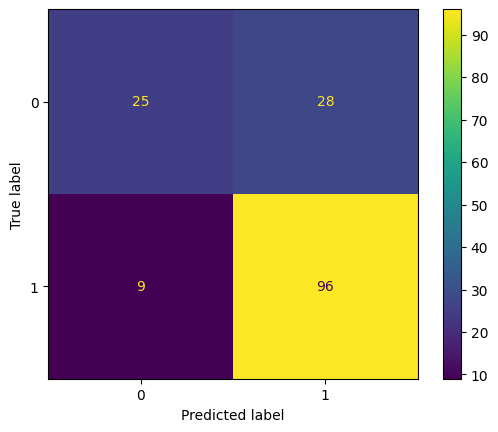

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

svc = SVC(C=10, kernel='linear')
svc.fit(X_train,y_train)

print("Train accuracy: ", svc.score(X_train, y_train))
print("Test accuracy: ", svc.score(X_test, y_test))

# Get predictions
y_pred1 = svc.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classification report
print(classification_report(y_test, y_pred1))


/home/raedin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/raedin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/raedin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/raedin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/raedin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/raedin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fail

Best parameters:  {'C': 10, 'intercept_scaling': 9, 'loss': 'hinge', 'random_state': 3}
Train accuracy:  0.7510548523206751
Test accuracy:  0.7531645569620253
              precision    recall  f1-score   support

         0.0       0.68      0.49      0.57        53
         1.0       0.78      0.89      0.83       105

    accuracy                           0.75       158
   macro avg       0.73      0.69      0.70       158
weighted avg       0.74      0.75      0.74       158



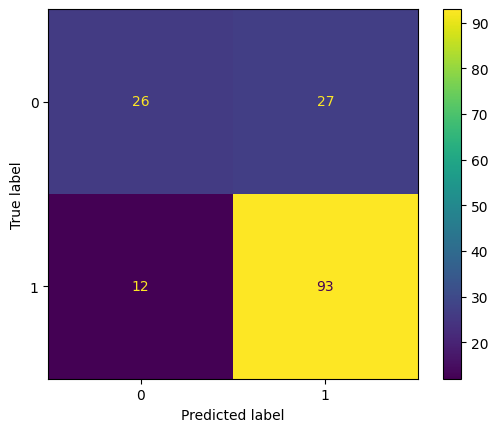

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import LinearSVC
svc = LinearSVC()

param_grid = {  'C':[9, 10, 11],
                # 'penalty':['l1', 'l2'],
                'loss':['hinge'],
                # 'dual':[True, False],
                # 'tol':[0.0001, 0.0001, 0.00001,],
                # 'multi_class':['ovr', 'crammer_singer'],
                'intercept_scaling':[9],
                # 'fit_intercept':[True, False],
                # 'class_weight':[None, 'balanced'],
                # 'max_iter':[1000],
                'random_state':[3],
              }

gs_lsvc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
gs_lsvc.fit(X_train, y_train)

print("Best parameters: ", gs_lsvc.best_params_)
print("Train accuracy: ", gs_lsvc.score(X_train, y_train))
print("Test accuracy: ", gs_lsvc.score(X_test, y_test))

# Get predictions
y_pred2 = gs_lsvc.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classification report
print(classification_report(y_test, y_pred2))


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Define SVM model
svc = SVC(C=10.0, kernel='linear')

# Encode and scale the data
# benc_df = binary_encode()
# benc_df.pop('passed')
# scaler = RobustScaler()
# scaled_features = scaler.fit_transform(benc_df)
# final_df = pd.DataFrame(scaled_features)

# Split data into input features and target variable
X = lenc_df.drop('passed', axis=1)
y = lenc_df['passed']

# Perform cross-validation
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')

# Print average score and standard deviation of scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.709 (+/- 0.072)


# Final Step: Saving the model

In [23]:
import pickle

In [24]:
filename = 'trained_model.sav'
pickle.dump(gs_lsvc, open(filename, 'wb'))
